In [1]:
from langgraph.graph import StateGraph,START,END
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict

In [2]:
load_dotenv()

True

In [3]:
model=ChatOpenAI(model="openai/gpt-4.1-nano",base_url="https://openrouter.ai/api/v1")

In [4]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explanation:str

In [5]:
graph=StateGraph(JokeState)

In [6]:
checkpointer=InMemorySaver()

In [7]:
def gen_joke(state:JokeState)->dict:
    topic:str=state["topic"]
    prompt:str=f"""
    You are a world class comedian you are standing on the stage
     and you have to deliver a joke on the topic: {topic}        
 """
    joke=model.invoke(prompt).content

    return{"joke":joke}


In [8]:
def exp_joke(state:JokeState)->dict:

    joke=state['joke']

    prompt=f"""
        decode the meaning of this joke:'{joke}'
        ,and explain it.
"""
    explanation=model.invoke(prompt)

    return{"explanation":explanation.content}

In [9]:
graph.add_node("gen_joke",gen_joke)
graph.add_node("exp_joke",exp_joke)

In [10]:
graph.add_edge(START,"gen_joke")
graph.add_edge("gen_joke","exp_joke")
graph.add_edge("exp_joke",END)

In [11]:
workflow=graph.compile(checkpointer=checkpointer)

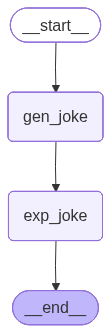

In [12]:
workflow

In [13]:
config1={"configurable":{"thread_id":"1"}}
workflow.invoke({"topic":"cricket"},config=config1)

{'topic': 'cricket',
 'joke': 'Alright, folks, let’s talk about cricket—a sport that makes you celebrate when even the smallest dot ball is a victory! I mean, in cricket, getting a single run feels like winning the lottery, but missing a catch is like losing your house! And don\'t get me started on the umpires—those guys are like referees in a game of "Whose Call Is It Anyway?" Honestly, I think cricket is just a fancy way to practice patience... because waiting five days for a match to end is the real test of human endurance!',
 'explanation': 'This joke humorously highlights the peculiarities and frustrations associated with the sport of cricket. Here\'s a breakdown of its meaning:\n\n1. **Celebrating small victories:**  \n   - "Celebrating when even the smallest dot ball is a victory" refers to how in cricket, every single run (or a dot ball with no runs scored) is appreciated, especially because the sport\'s scores can be low-scoring or tense.\n\n2. **Exaggerated importance of even

In [14]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'cricket', 'joke': 'Alright, folks, let’s talk about cricket—a sport that makes you celebrate when even the smallest dot ball is a victory! I mean, in cricket, getting a single run feels like winning the lottery, but missing a catch is like losing your house! And don\'t get me started on the umpires—those guys are like referees in a game of "Whose Call Is It Anyway?" Honestly, I think cricket is just a fancy way to practice patience... because waiting five days for a match to end is the real test of human endurance!', 'explanation': 'This joke humorously highlights the peculiarities and frustrations associated with the sport of cricket. Here\'s a breakdown of its meaning:\n\n1. **Celebrating small victories:**  \n   - "Celebrating when even the smallest dot ball is a victory" refers to how in cricket, every single run (or a dot ball with no runs scored) is appreciated, especially because the sport\'s scores can be low-scoring or tense.\n\n2. **Exaggerated

In [15]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'cricket', 'joke': 'Alright, folks, let’s talk about cricket—a sport that makes you celebrate when even the smallest dot ball is a victory! I mean, in cricket, getting a single run feels like winning the lottery, but missing a catch is like losing your house! And don\'t get me started on the umpires—those guys are like referees in a game of "Whose Call Is It Anyway?" Honestly, I think cricket is just a fancy way to practice patience... because waiting five days for a match to end is the real test of human endurance!', 'explanation': 'This joke humorously highlights the peculiarities and frustrations associated with the sport of cricket. Here\'s a breakdown of its meaning:\n\n1. **Celebrating small victories:**  \n   - "Celebrating when even the smallest dot ball is a victory" refers to how in cricket, every single run (or a dot ball with no runs scored) is appreciated, especially because the sport\'s scores can be low-scoring or tense.\n\n2. **Exaggerate

TIME TRAVEL IN LANGGRAPH

In [17]:
workflow.invoke(None,{"configurable":{"thread_id":"1","checkpoint_id":"1f0f49b6-96ec-62fc-bfff-e6223eb1b3aa"}})

{'topic': 'cricket',
 'joke': "Alright, folks, let's talk about cricket! You know, cricket is basically a pretty intense game—between trying to hit the ball and not getting hit by it. It's like... \n\nImagine having a job where your boss throws a ball at you and expects you to hit it with a tiny stick—then if you miss, everyone mocks you for days. And the boss just keeps tossing more balls until you finally get it right!  \n\nAnd don’t get me started on the cricket fans. They’re so passionate, they treat the game like a matter of national security. If their team loses, you’d think it was a diplomatic crisis! Suddenly, everyone’s a cricket expert, arguing over whether the player should’ve played a faster shot or a slower spin. \n\nCricket: the only sport where you can spend five days watching a match and still not know who won—but hey, at least you get some great excuses for drinking tea and discussing it until about next week!",
 'explanation': 'This joke humorously exaggerates the qui

In [18]:
#update state
workflow.update_state({'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f49b6-96ee-6b4a-8000-9b3abb5e2960'}},{"topic":"football"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f49ca-d48e-61b1-8001-f2e586953b11'}}

In [19]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'football'}, next=('gen_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f49ca-d48e-61b1-8001-f2e586953b11'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-01-18T18:37:00.779552+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f49b6-96ee-6b4a-8000-9b3abb5e2960'}}, tasks=(PregelTask(id='191b5b89-4427-cb79-e76f-08281967a9b9', name='gen_joke', path=('__pregel_pull', 'gen_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'cricket', 'joke': "Alright, folks, let's talk about cricket! You know, cricket is basically a pretty intense game—between trying to hit the ball and not getting hit by it. It's like... \n\nImagine having a job where your boss throws a ball at you and expects you to hit it with a tiny stick—then if you miss, everyone mocks you for days. And the boss just keep

In [20]:
workflow.invoke(None,config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f49ca-d48e-61b1-8001-f2e586953b11'}})

{'topic': 'football',
 'joke': 'Alright, folks, you know I love football — or as I call it, "the game of guys trying to avoid running." I mean, they chase a ball for 90 minutes, and at the end, half of them act like they just ran a marathon! And the other half? They’re just there for the snacks and the chants. Honestly, if I wanted that much drama, I\'d just watch my family at Thanksgiving! Thank you, thank you — I’ll be here all week!',
 'explanation': 'Certainly! This joke humorously plays on the common perceptions and stereotypes about football (soccer). Here\'s a breakdown of its meaning:\n\n1. **"The game of guys trying to avoid running"**:\n   - The joke suggests that players manipulate the game to avoid exhausting themselves by running, which is a humorous exaggeration. It pokes fun at how some players might pretend to get hurt or slow down to waste time or avoid physical exertion.\n\n2. **"Chase a ball for 90 minutes"**:\n   - It highlights the length and constant movement in f